#  Plot measurement locations over all shots, look for overlap

In [194]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('talk')

import numpy as np
import sqlite3

Good shot heuristics

In [195]:
good_shot_condition = "fiducial_pre_crowbar_gyration_spectral_density >= :sd AND bias_current_peak >= :peak" 

In [196]:
good_shot_condition_dict = {'sd': 1.6*10**-8, 'peak': 0.1}

# Mach probe

## Which z-planes?

In [197]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()
cursor.execute("Select mach_z FROM Shots WHERE mach_z IS NOT NULL;")
mach_z = cursor.fetchall()
cursor.close()
connection.close()

In [198]:
print set(mach_z)

set([(0.302,), (0.416,), (0.249,)])


## z=0.249m plane

In [199]:
connection = sqlite3.connect('shots.db')
connection.row_factory = sqlite3.Row
cursor = connection.cursor()
cursor.execute("Select mach_x, mach_y, mach_orientation FROM Shots WHERE mach_z=0.249 AND "+ 
               good_shot_condition +";", good_shot_condition_dict)
mach_z_0249_rows = cursor.fetchall()
cursor.close()
connection.close()

In [200]:
orientations = set([])
for row in mach_z_0249_rows:
    orientations.add(row['mach_orientation'])
print orientations

set([0.0, 180.0, u'-'])


In [201]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()

cursor.execute("Select mach_x FROM Shots WHERE mach_z=0.249 AND mach_orientation=0.0 AND " +
               good_shot_condition + ";", good_shot_condition_dict)
mach_x_z0249_0 = cursor.fetchall()
mach_x_z0249_0 = np.asarray(mach_x_z0249_0).ravel()

cursor.execute("Select mach_y FROM Shots WHERE mach_z=0.249 AND mach_orientation=0.0 AND " +
                good_shot_condition + ";", good_shot_condition_dict)
mach_y_z0249_0 = cursor.fetchall()
mach_y_z0249_0 = np.asarray(mach_y_z0249_0).ravel()

cursor.execute("Select mach_x FROM Shots WHERE mach_z=0.249 AND mach_orientation=180.0 AND " +
               good_shot_condition + ";", good_shot_condition_dict)
mach_x_z0249_180 = cursor.fetchall()
mach_x_z0249_180 = np.asarray(mach_x_z0249_180).ravel()

cursor.execute("Select mach_y FROM Shots WHERE mach_z=0.249 AND mach_orientation=180.0 AND " + 
               good_shot_condition + ";", good_shot_condition_dict)
mach_y_z0249_180 = cursor.fetchall()
mach_y_z0249_180 = np.asarray(mach_y_z0249_180).ravel()

cursor.close()
connection.close()

mach_z0249_0 = np.hstack((mach_x_z0249_0, mach_y_z0249_0))

### z=0.249m   $\theta = 0$

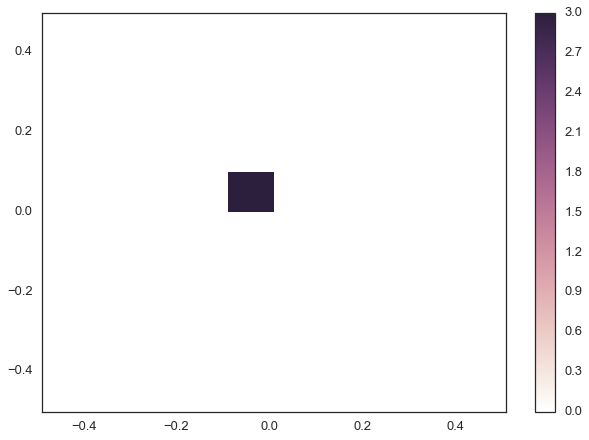

In [203]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.hist2d(mach_x_z0249_0, mach_y_z0249_0, cmap=cmap,)
plt.colorbar()

### z=0.249m  $\theta = 180$

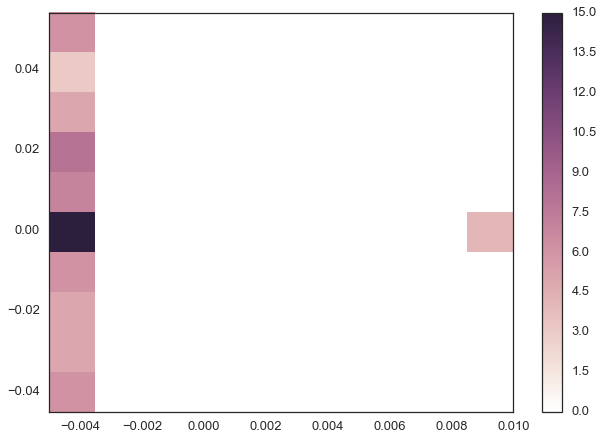

In [153]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.hist2d(mach_x_z0249_180, mach_y_z0249_180, cmap=cmap)
plt.colorbar()

## z= 0.302m

In [155]:
connection = sqlite3.connect('shots.db')
connection.row_factory = sqlite3.Row
cursor = connection.cursor()
cursor.execute("Select mach_x, mach_y, mach_orientation FROM Shots WHERE mach_z=0.302 AND " +
               good_shot_condition + ";", good_shot_condition_dict)
mach_z_0302_rows = cursor.fetchall()
cursor.close()
connection.close()

In [156]:
orientations = set([])
for row in mach_z_0302_rows:
    orientations.add(row['mach_orientation'])
print orientations

set([0.0])


### z=0.302m  $\theta = 0$

In [157]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()

cursor.execute("Select mach_x FROM Shots WHERE mach_z=0.302 AND mach_orientation=0.0 AND " +
                good_shot_condition + ";", good_shot_condition_dict)
mach_x_z0302_0 = cursor.fetchall()
mach_x_z0302_0 = np.asarray(mach_x_z0302_0).ravel()

cursor.execute("Select mach_y FROM Shots WHERE mach_z=0.302 AND mach_orientation=0.0 AND " +
               good_shot_condition + ";", good_shot_condition_dict)
mach_y_z0302_0 = cursor.fetchall()
mach_y_z0302_0 = np.asarray(mach_y_z0302_0).ravel()

cursor.close()
connection.close()

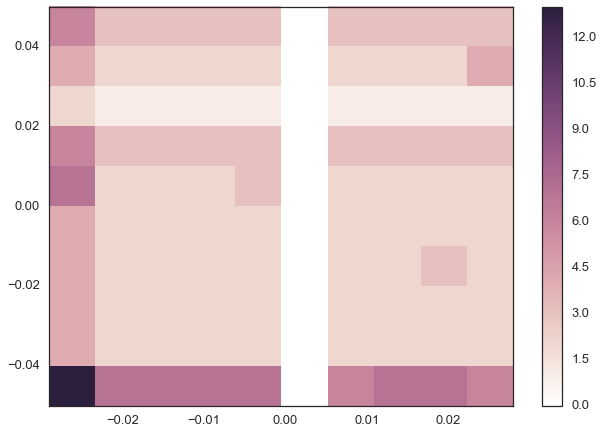

In [158]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.hist2d(mach_x_z0302_0, mach_y_z0302_0, cmap=cmap)
plt.colorbar()

## z=0.416m

In [99]:
connection = sqlite3.connect('shots.db')
connection.row_factory = sqlite3.Row
cursor = connection.cursor()
cursor.execute("Select mach_x, mach_y, mach_orientation FROM Shots WHERE mach_z=0.416;")
mach_z_0416_rows = cursor.fetchall()
cursor.close()
connection.close()

In [101]:
orientations = set([])
for row in mach_z_0416_rows:
    orientations.add(row['mach_orientation'])
print orientations

set([0.0, 160.0, 290.0, 100.0, 230.0, 40.0, 330.0, 140.0, 270.0, 80.0, 210.0, 20.0, 350.0, 310.0, 120.0, 180.0, 250.0, 60.0, 90.0, 190.0])


### z=0.416m  $\theta = 0$

In [159]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()

cursor.execute("Select mach_x FROM Shots WHERE mach_z=0.416 AND mach_orientation=0.0 AND " +
               good_shot_condition + ";", good_shot_condition_dict)
mach_x_z0416_0 = cursor.fetchall()
mach_x_z0416_0 = np.asarray(mach_x_z0416_0).ravel()

cursor.execute("Select mach_y FROM Shots WHERE mach_z=0.416 AND mach_orientation=0.0 AND " +
               good_shot_condition + ";", good_shot_condition_dict)
mach_y_z0416_0 = cursor.fetchall()
mach_y_z0416_0 = np.asarray(mach_y_z0416_0).ravel()

cursor.close()
connection.close()

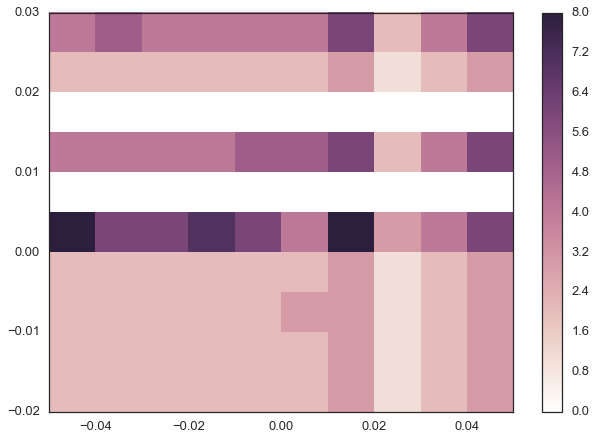

In [160]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.hist2d(mach_x_z0416_0, mach_y_z0416_0, cmap=cmap)
plt.colorbar()

In [161]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()

cursor.execute("Select mach_x FROM Shots WHERE mach_z=0.416 AND mach_orientation=90.0 AND " + 
               good_shot_condition + ";", good_shot_condition_dict)
mach_x_z0416_90 = cursor.fetchall()
mach_x_z0416_90 = np.asarray(mach_x_z0416_90).ravel()

cursor.execute("Select mach_y FROM Shots WHERE mach_z=0.416 AND mach_orientation=90.0 AND " +
               good_shot_condition + ";", good_shot_condition_dict)
mach_y_z0416_90 = cursor.fetchall()
mach_y_z0416_90 = np.asarray(mach_y_z0416_90).ravel()

cursor.close()
connection.close()

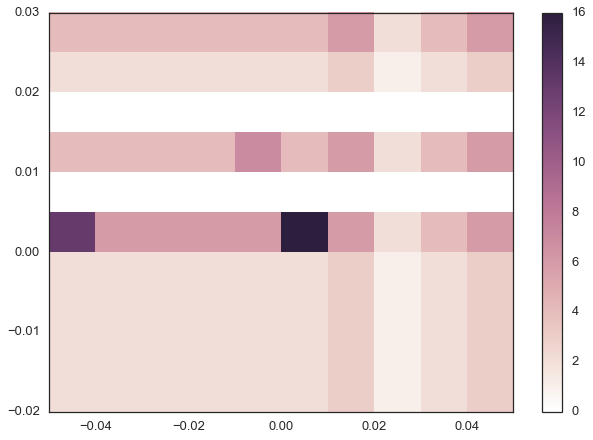

In [162]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.hist2d(mach_x_z0416_90, mach_y_z0416_90, cmap=cmap)
plt.colorbar()
plt.show()

In [163]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()

cursor.execute("Select mach_x FROM Shots WHERE mach_z=0.416 AND mach_orientation=160.0 AND " +
               good_shot_condition + ";", good_shot_condition_dict)
mach_x_z0416_160 = cursor.fetchall()
mach_x_z0416_160 = np.asarray(mach_x_z0416_160).ravel()

cursor.execute("Select mach_y FROM Shots WHERE mach_z=0.416 AND mach_orientation=160.0 AND " +
               good_shot_condition + ";", good_shot_condition_dict)
mach_y_z0416_160 = cursor.fetchall()
mach_y_z0416_160 = np.asarray(mach_y_z0416_160).ravel()

cursor.close()
connection.close()

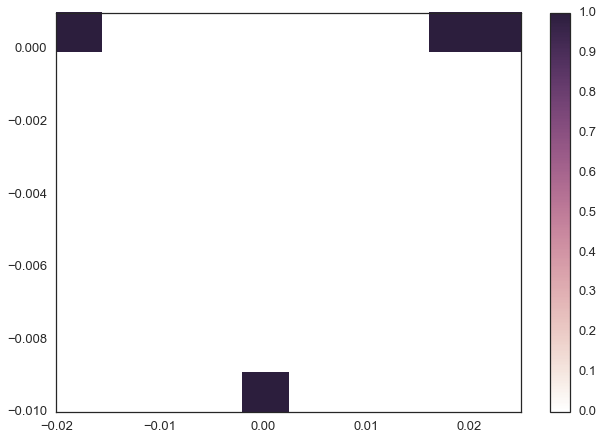

In [164]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.hist2d(mach_x_z0416_160, mach_y_z0416_160, cmap=cmap)
plt.colorbar()
plt.show()

# Triple probe

## Tp1

In [165]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()
cursor.execute("Select tp1_z FROM Shots WHERE tp1_z IS NOT NULL;")
tp1_z = cursor.fetchall()
cursor.close()
connection.close()
print set(tp1_z)

set([(0.302,), (0.249,)])


In [166]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()

cursor.execute("Select tp1_x FROM Shots WHERE tp1_z=0.249 AND " + good_shot_condition + ";", 
               good_shot_condition_dict)
tp1_x_z0249 = cursor.fetchall()
tp1_x_z0249 = np.asarray(tp1_x_z0249).ravel()

cursor.execute("Select tp1_y FROM Shots WHERE tp1_z=0.249 AND " + good_shot_condition + ";", 
               good_shot_condition_dict)
tp1_y_z0249 = cursor.fetchall()
tp1_y_z0249 = np.asarray(tp1_y_z0249).ravel()

cursor.close()
connection.close()

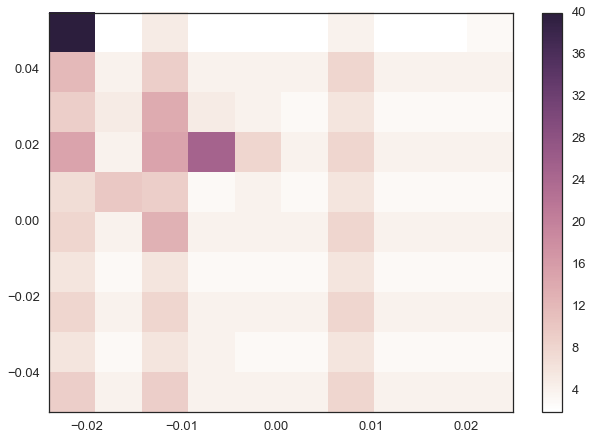

In [167]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.hist2d(tp1_x_z0249, tp1_y_z0249, cmap=cmap)
plt.colorbar()
plt.show()

In [168]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()

cursor.execute("Select tp1_x FROM Shots WHERE tp1_z=0.302 AND " + good_shot_condition + ";", 
               good_shot_condition_dict)
tp1_x_z0302 = cursor.fetchall()
tp1_x_z0302 = np.asarray(tp1_x_z0302).ravel()

cursor.execute("Select tp1_y FROM Shots WHERE tp1_z=0.302 AND " + good_shot_condition + ";", 
               good_shot_condition_dict)
tp1_y_z0302 = cursor.fetchall()
tp1_y_z0302 = np.asarray(tp1_y_z0302).ravel()

cursor.close()
connection.close()

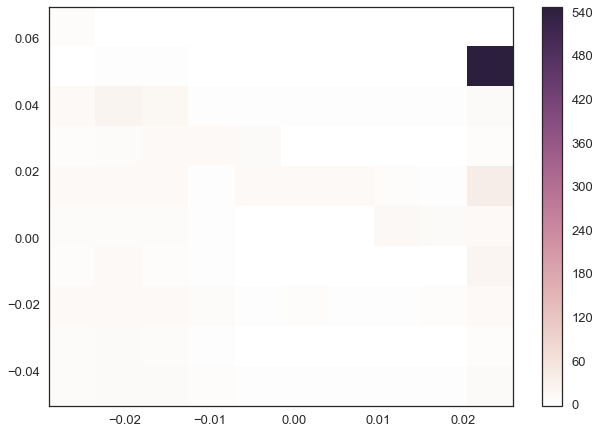

In [169]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.hist2d(tp1_x_z0302, tp1_y_z0302, cmap=cmap)
plt.colorbar()
plt.show()

## Tp2

In [175]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()
cursor.execute("Select tp2_z FROM Shots WHERE tp2_z IS NOT NULL;")
tp2_z = cursor.fetchall()
cursor.close()
connection.close()
print set(tp2_z)

set([(0.416,), (0.357,)])


In [183]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()

cursor.execute("Select tp2_x FROM Shots WHERE tp2_z=0.357 AND " + good_shot_condition + ";", 
               good_shot_condition_dict)
tp2_x_z0357 = cursor.fetchall()
tp2_x_z0357 = np.asarray(tp2_x_z0357).ravel()

cursor.execute("Select tp2_y FROM Shots WHERE tp2_z=0.357 AND " + good_shot_condition + ";", 
               good_shot_condition_dict)
tp2_y_z0357 = cursor.fetchall()
tp2_y_z0357 = np.asarray(tp2_y_z0357).ravel()

cursor.close()
connection.close()

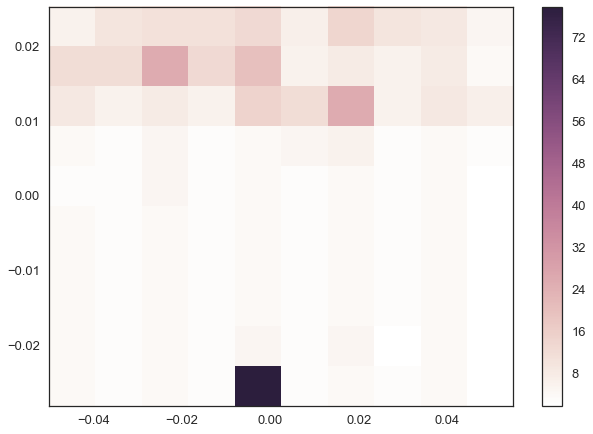

In [184]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.hist2d(tp2_x_z0357, tp2_y_z0357, cmap=cmap)
plt.colorbar()
plt.show()

In [192]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()

cursor.execute("Select tp2_x FROM Shots WHERE tp2_z=0.416 AND " + good_shot_condition + ";", 
               good_shot_condition_dict)
tp2_x_z0416 = cursor.fetchall()
tp2_x_z0416 = np.asarray(tp2_x_z0416).ravel()

cursor.execute("Select tp2_y FROM Shots WHERE tp2_z=0.416 AND " + good_shot_condition + ";", 
               good_shot_condition_dict)
tp2_y_z0416 = cursor.fetchall()
tp2_y_z0416 = np.asarray(tp2_y_z0416).ravel()

cursor.close()
connection.close()

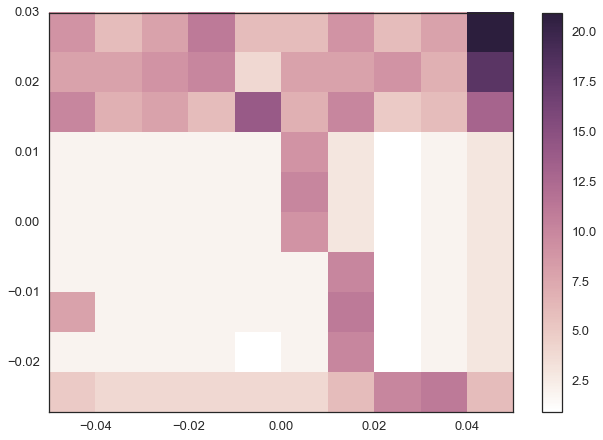

In [193]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.hist2d(tp2_x_z0416, tp2_y_z0416, cmap=cmap)
plt.colorbar()
plt.show()

# Bdot probe

In [13]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()
cursor.execute("Select bdot3a_z FROM Shots WHERE bdot3a_z IS NOT NULL;")
bdot3a_z = cursor.fetchall()
cursor.close()
connection.close()
print set(bdot3a_z)

set([(0.302,), (0.249,)])


In [14]:
connection = sqlite3.connect('shots.db')
cursor = connection.cursor()
cursor.execute("Select bdot10_z FROM Shots WHERE bdot10_z IS NOT NULL;")
bdot10_z = cursor.fetchall()
cursor.close()
connection.close()
print set(bdot10_z)

set([(0.416,), (0.357,)])
